In [91]:
import pandas as pd
df = pd.read_excel('/Users/santi/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/Uni/4/TFG/Proyecto/dataAcquisition/Amazon/AmazonSaleReport.xlsx')
pd.set_option('display.max_columns', None)
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [92]:
print(df.columns)

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


In [93]:
df['promotion-ids'] = df['promotion-ids'].apply(lambda x: False if pd.isna(x) else True)

In [94]:
df['promotion-ids'].value_counts()

promotion-ids
True     79822
False    49153
Name: count, dtype: int64

In [95]:
#We have to think of something to do about the distance in shipments.

In [96]:
df.drop(['Order ID', 'Status', 'Unnamed: 22', 'SKU', 'ASIN', 'Courier Status', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'Style'], axis=1, inplace=True)

In [97]:

print(df['fulfilled-by'].unique())
df['fulfilled-by'] = df['fulfilled-by'].apply(lambda x: True if x == 'Easy Ship' else False)
df.rename(columns={'fulfilled-by': 'fulfilledEasyShip'}, inplace=True)

['Easy Ship' nan]


In [98]:
df.head()

,Date,Fulfilment,Sales Channel,ship-service-level,Category,Size,Qty,currency,Amount,promotion-ids,B2B,fulfilledEasyShip
0,2022-04-30,Merchant,Amazon.in,Standard,Set,S,0,INR,647.62,False,False,True
1,2022-04-30,Merchant,Amazon.in,Standard,kurta,3XL,1,INR,406.00,True,False,True
2,2022-04-30,Amazon,Amazon.in,Expedited,kurta,XL,1,INR,329.00,True,True,False
3,2022-04-30,Merchant,Amazon.in,Standard,Western Dress,L,0,INR,753.33,False,False,True
4,2022-04-30,Amazon,Amazon.in,Expedited,Top,3XL,1,INR,574.00,False,False,False


In [99]:
print(df['Fulfilment'].unique())
df['Fulfilment'] = df['Fulfilment'].apply(lambda x: True if x == 'Amazon' else False)
df.rename(columns={'Fulfilment': 'FBA'}, inplace=True)

['Merchant' 'Amazon']


In [100]:
print(df['Sales Channel '].unique())
df['Sales Channel '] = df['Sales Channel '].apply(lambda x: True if x == 'Amazon.in' else False)
df.rename(columns={'Sales Channel ': 'soldAmazonIn'}, inplace=True)

['Amazon.in' 'Non-Amazon']


In [101]:
print(df['currency'].unique())
df['currency'] = df['currency'].apply(lambda x: True if x == 'INR' else False)
df.rename(columns={'currency': 'paidINR'}, inplace=True)

['INR' nan]


In [102]:
print(df['ship-service-level'].unique())
df['ship-service-level'] = df['ship-service-level'].apply(lambda x: True if x == 'Standard' else False)
df.rename(columns={'ship-service-level': 'standardShipping'}, inplace=True)

['Standard' 'Expedited']


In [103]:
# Make dummy variables for status
df_dummies = pd.get_dummies(df, columns=['Size'])


In [104]:
df_dummies.head()

,Date,FBA,soldAmazonIn,standardShipping,Category,Qty,paidINR,Amount,promotion-ids,B2B,fulfilledEasyShip,Size_3XL,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
0,2022-04-30,False,True,True,Set,0,True,647.62,False,False,True,False,False,False,False,False,False,False,True,False,False,False
1,2022-04-30,False,True,True,kurta,1,True,406.00,True,False,True,True,False,False,False,False,False,False,False,False,False,False
2,2022-04-30,True,True,False,kurta,1,True,329.00,True,True,False,False,False,False,False,False,False,False,False,True,False,False
3,2022-04-30,False,True,True,Western Dress,0,True,753.33,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,2022-04-30,True,True,False,Top,1,True,574.00,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [105]:
# If not fullfilled by Easy Ship, it is fullfilled by Amazon. No need to keep both columns.
df_dummies.drop('fulfilledEasyShip', axis=1, inplace=True)

In [106]:
df_dummies['Category'].value_counts()

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

In [107]:
categories_to_delete = ['Ethnic Dress', 'Blouse', 'Bottom', 'Saree', 'Dupatta']
df_dummies = df_dummies[~df_dummies['Category'].isin(categories_to_delete)]

In [108]:
df_dummies = pd.get_dummies(df_dummies, columns=['Category'])


In [109]:
df_dummies.head()

,Date,FBA,soldAmazonIn,standardShipping,Qty,paidINR,Amount,promotion-ids,B2B,Size_3XL,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL,Category_Set,Category_Top,Category_Western Dress,Category_kurta
0,2022-04-30,False,True,True,0,True,647.62,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,2022-04-30,False,True,True,1,True,406.00,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2022-04-30,True,True,False,1,True,329.00,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,2022-04-30,False,True,True,0,True,753.33,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,2022-04-30,True,True,False,1,True,574.00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False


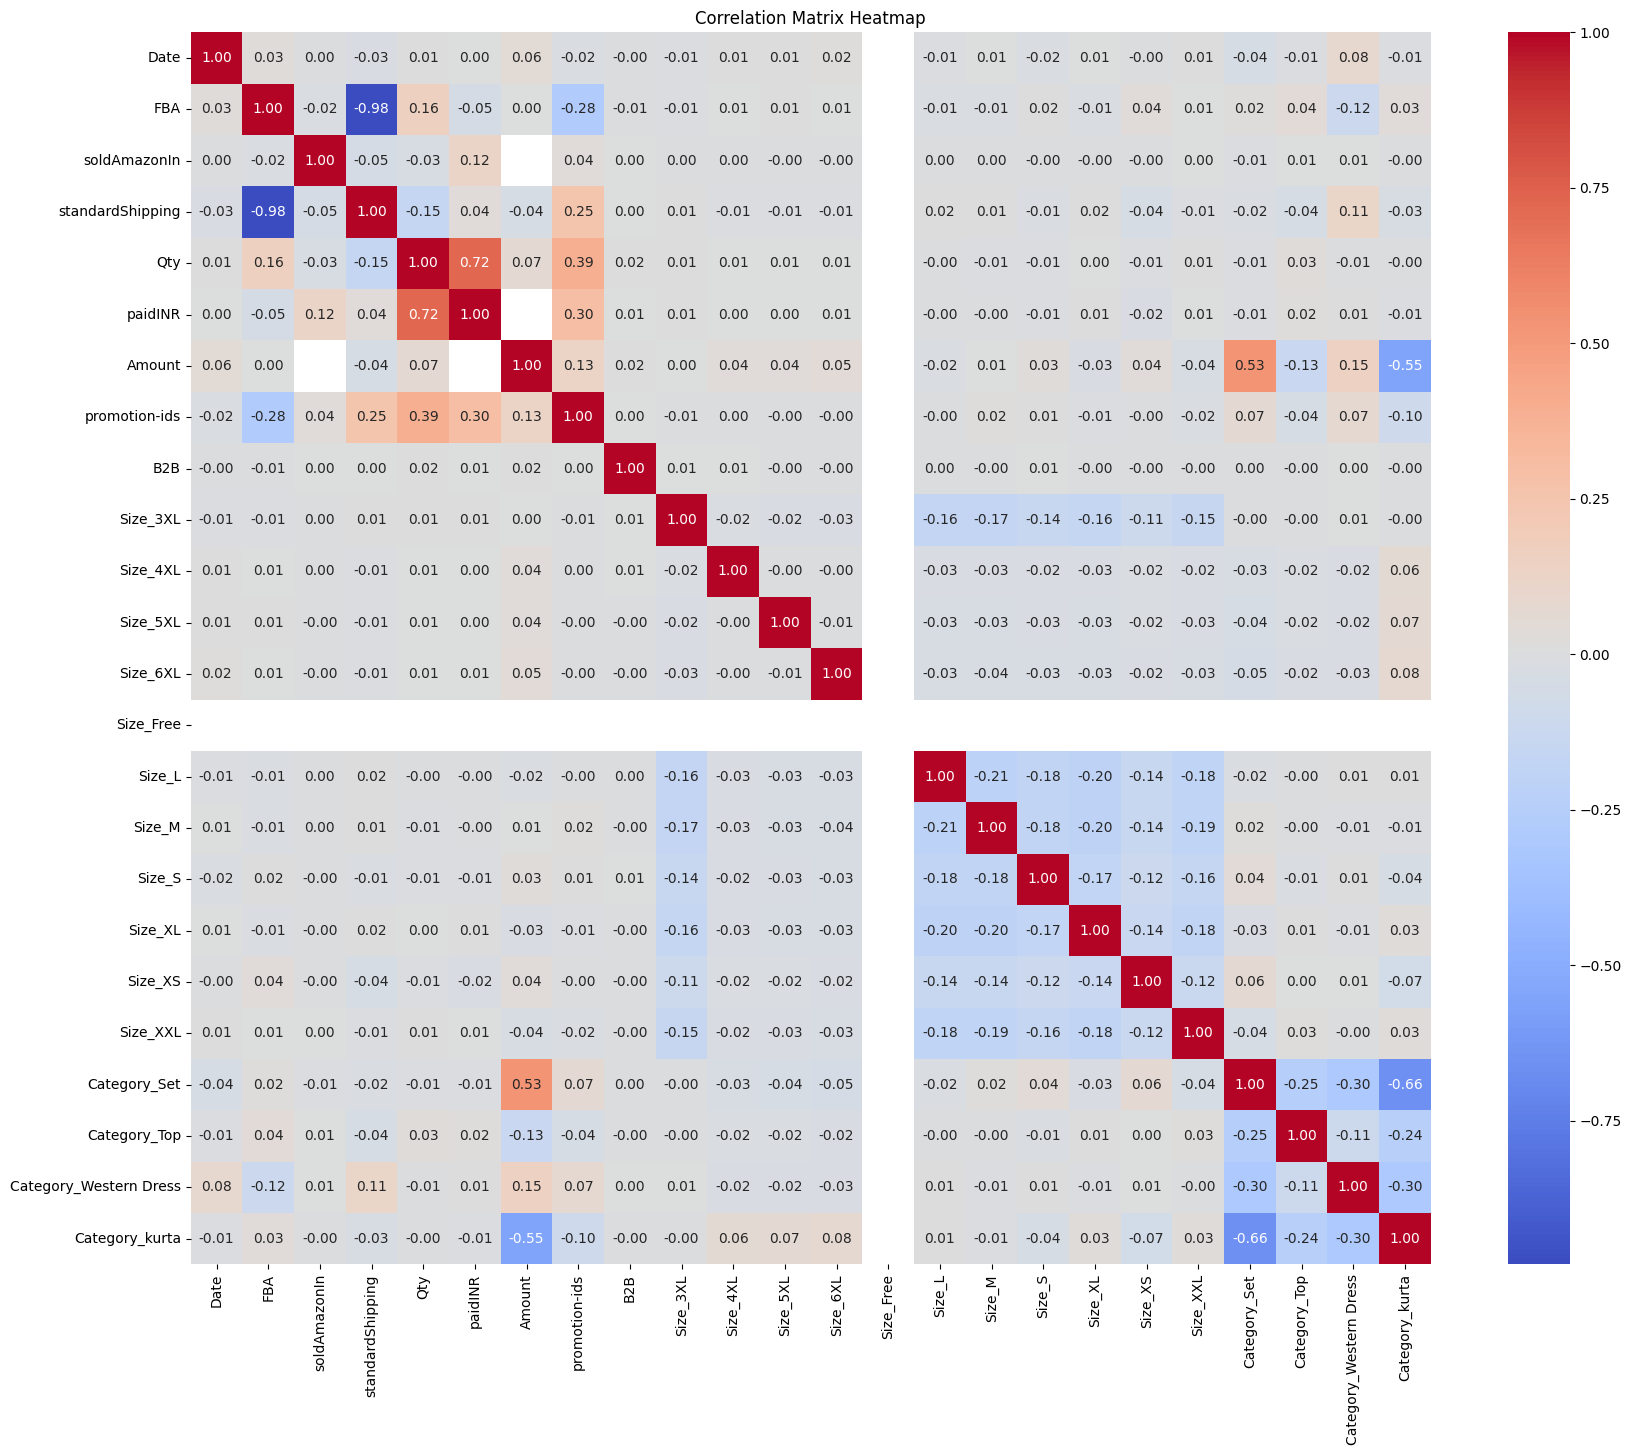

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_dummies.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()